In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
##finding the number of rows and columns
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#feature selection
X = df.iloc[:,[3,4]].values

In [11]:
# print(X)

In [12]:
# List to store WCSS values
wcss = []

# Calculating WCSS for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS is stored in the inertia_ attribute

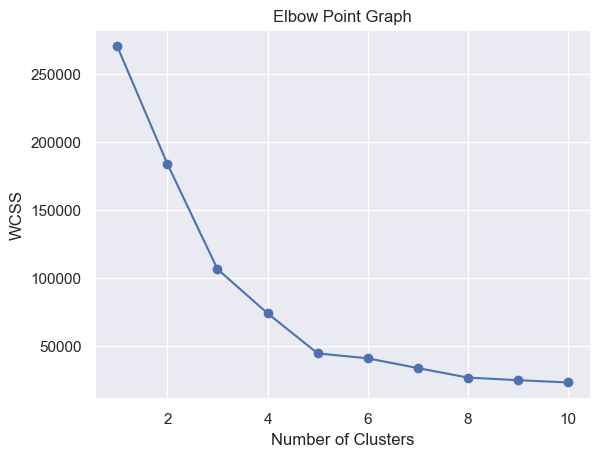

In [16]:
#plot an elbow graph

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the graph the optimum number of clusters =5

### Model Training

In [18]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
# return a label for each data point based on cluster

y = kmeans.fit_predict(X)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualizing all the clusters


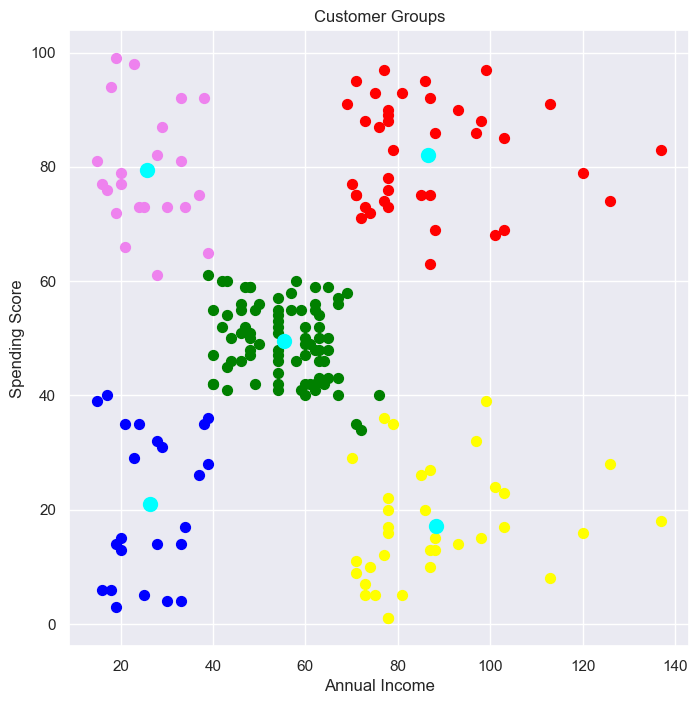

In [28]:
## plotting the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(X[y==0, 0], X[y==0, 1],  s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1],  s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1],  s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1],  s=50, c='blue', label='Cluster 4')
plt.scatter(X[y==4, 0], X[y==4, 1],  s=50, c='violet', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()